<a href="https://colab.research.google.com/github/manasamorthad/Machine-Learning/blob/main/week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/content/diabetes_DT.csv")
df.shape

(768, 9)

In [4]:
df=df.drop_duplicates()

In [5]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
feature_cols=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

In [9]:
X=df[feature_cols]
y=df['Outcome']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6796536796536796


In [13]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

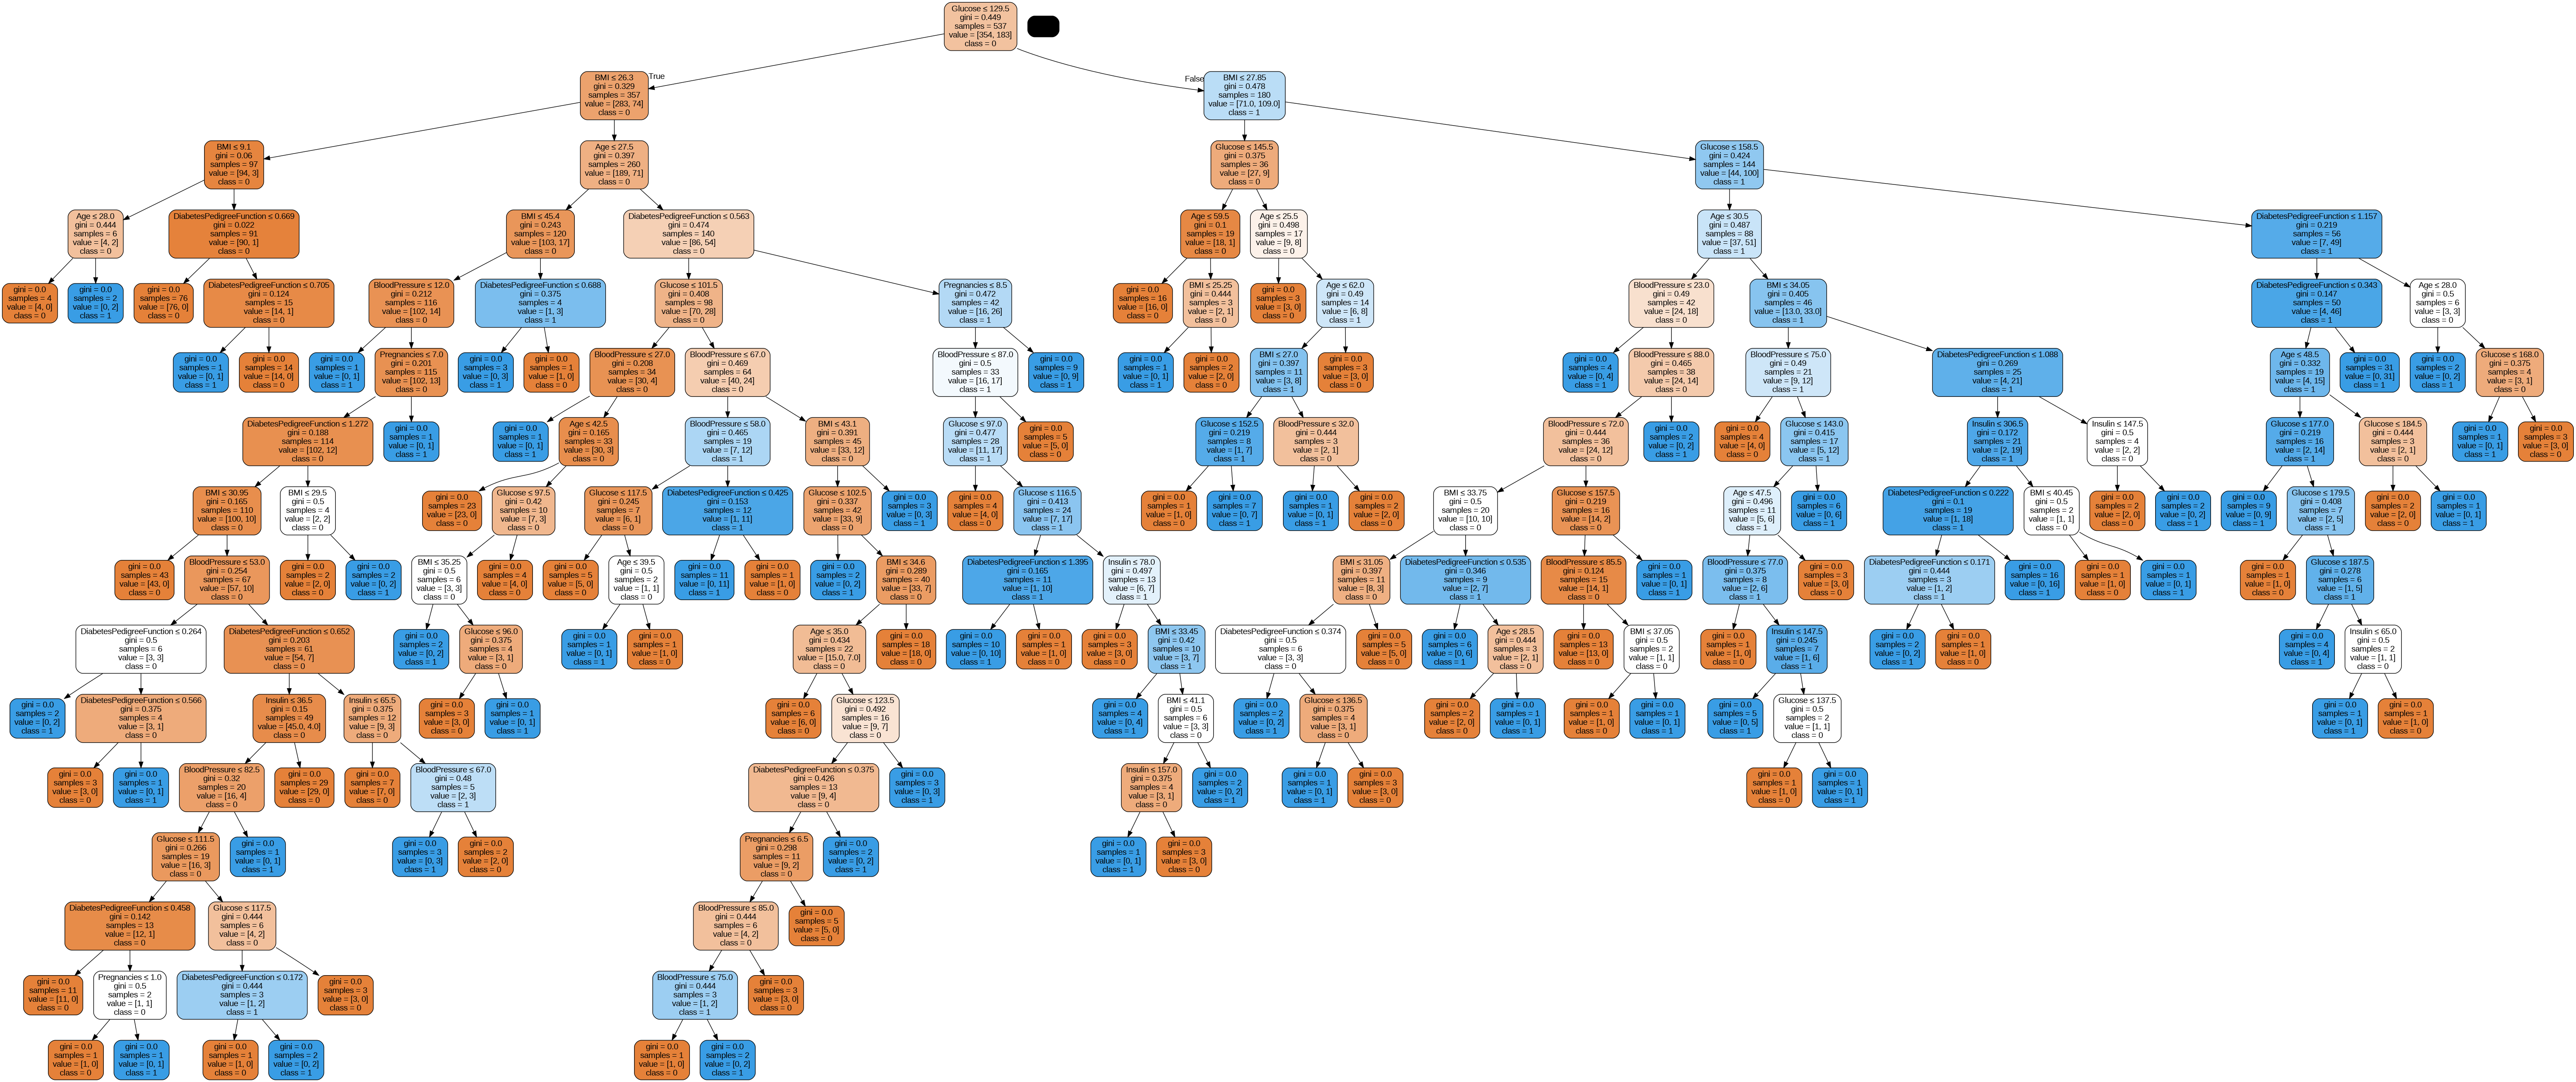

In [14]:
dot_data= StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [15]:
clf=DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [16]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7445887445887446


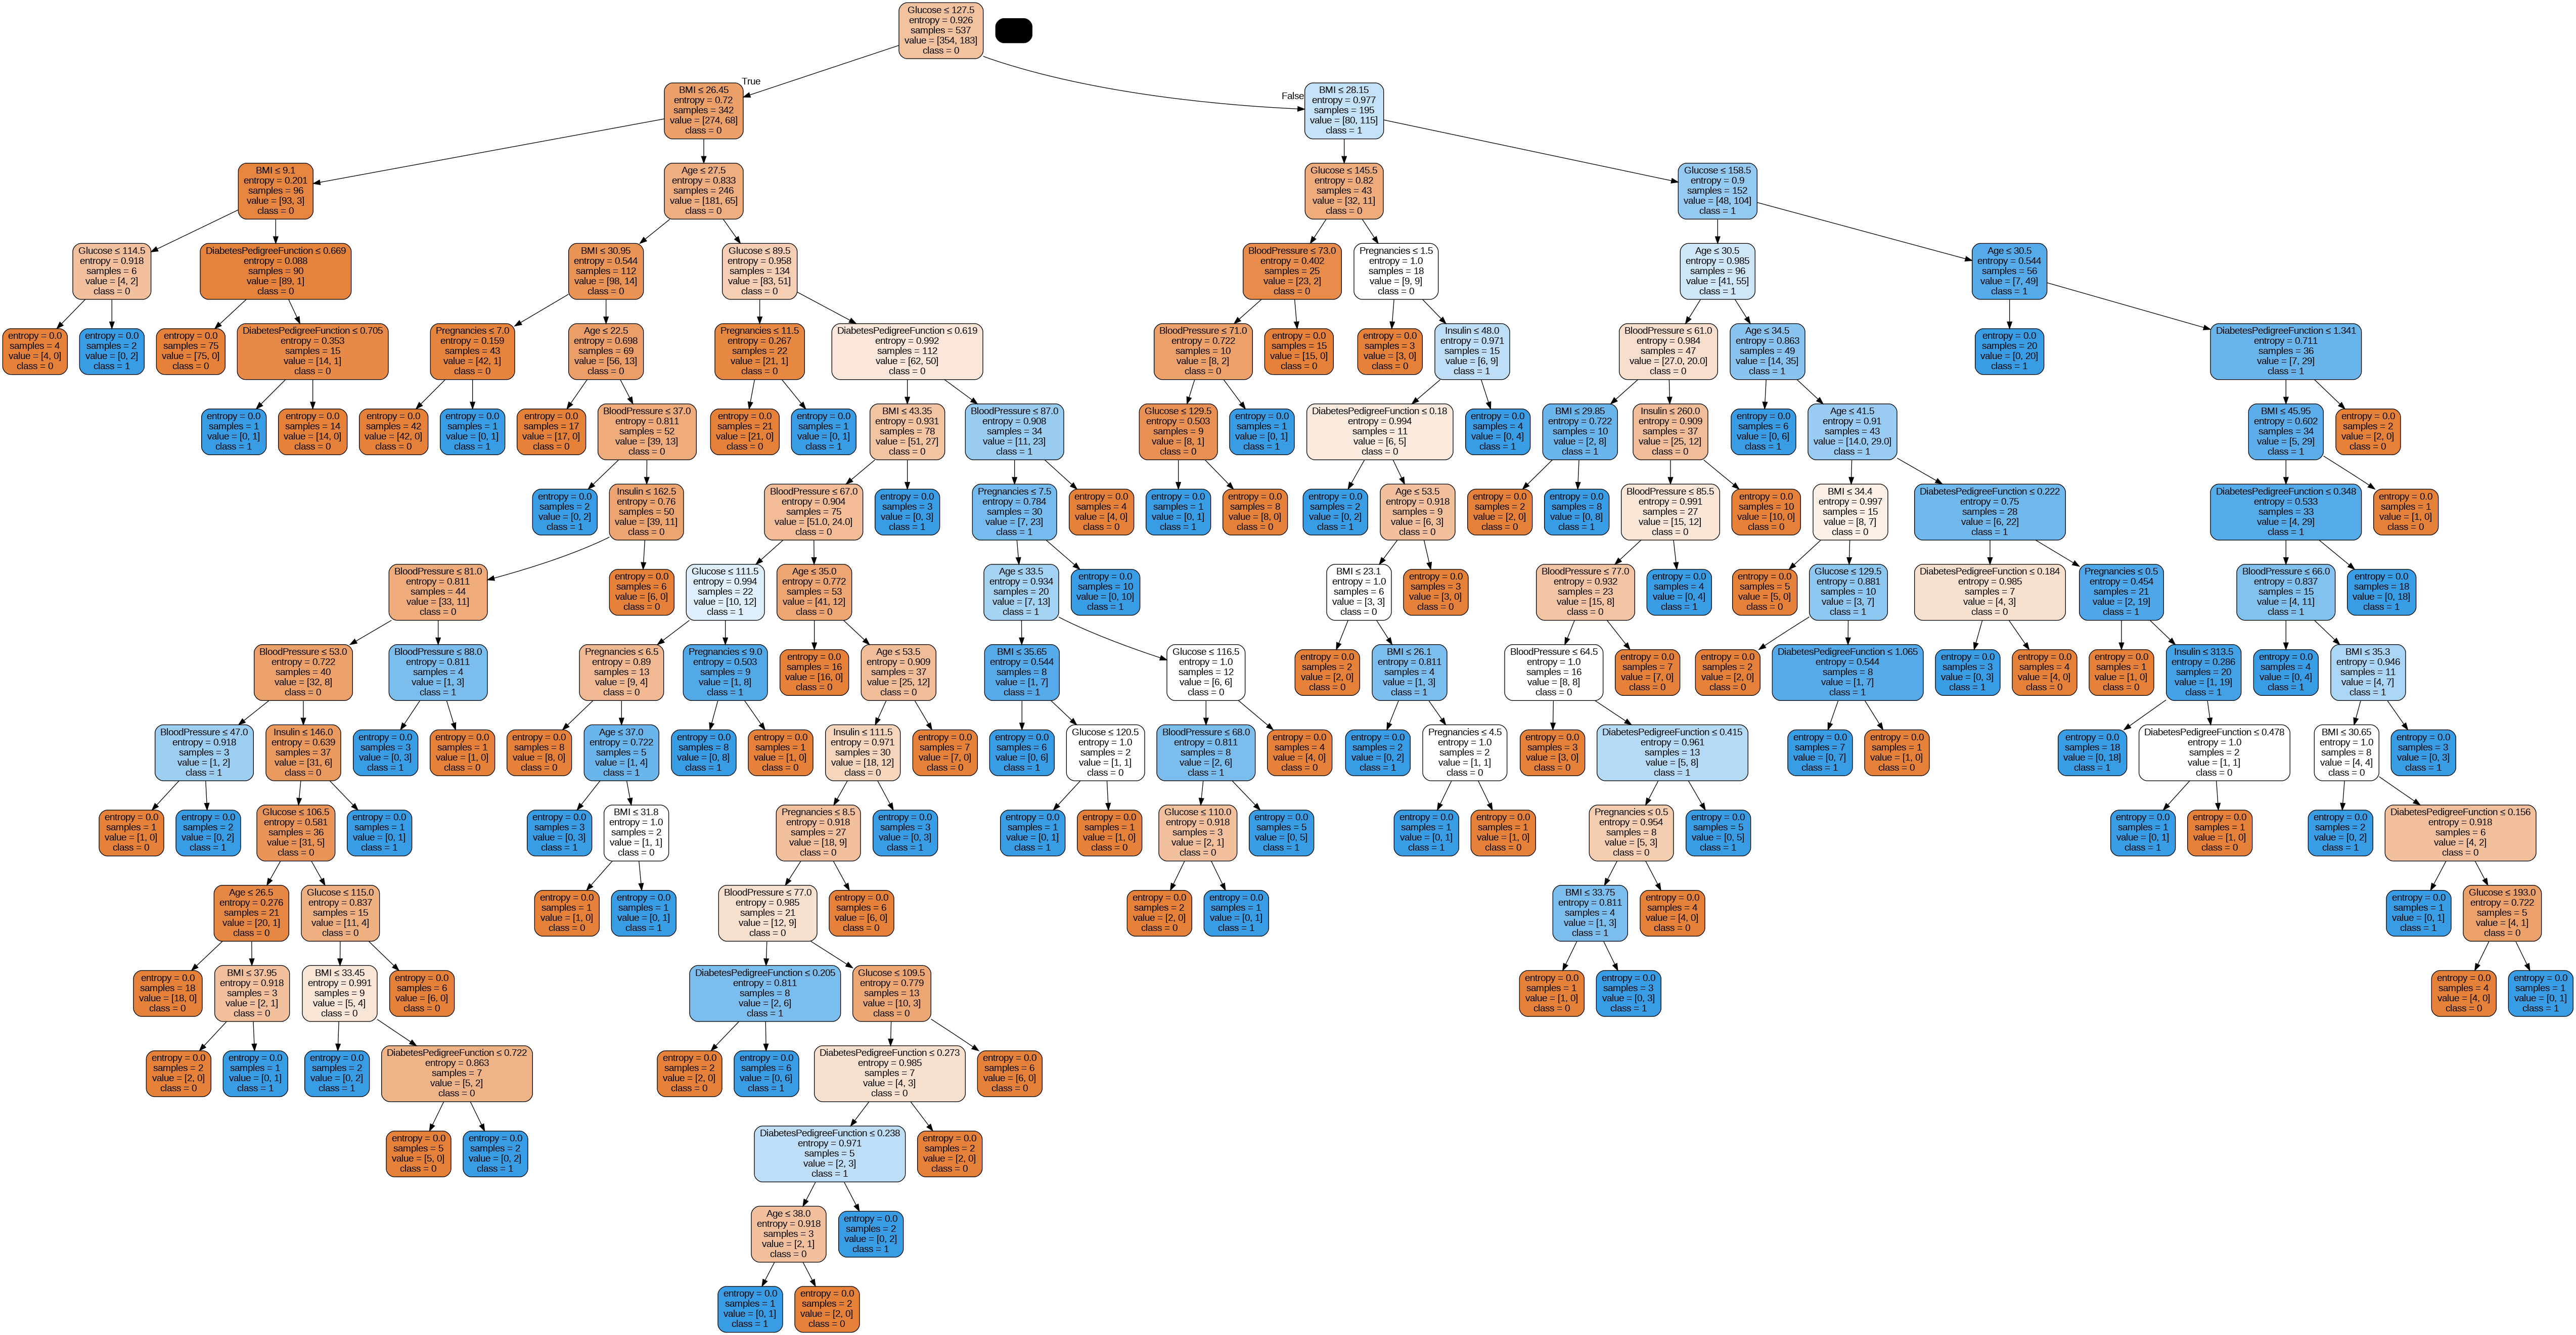

In [17]:
dot_data= StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [18]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=100)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7748917748917749


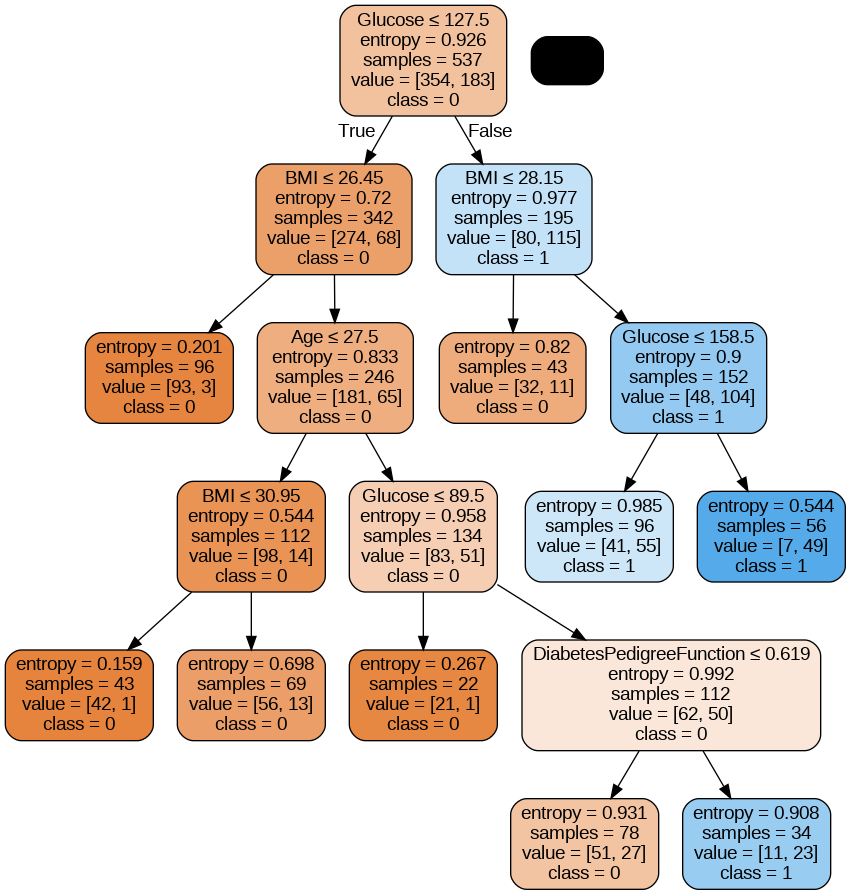

In [20]:
dot_data= StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


In [32]:
from sklearn.naive_bayes import GaussianNB

In [21]:
df2=pd.read_csv('/content/Loan_default.csv')
df2.shape

(255347, 18)

In [22]:
df2=df2.drop_duplicates()

In [23]:
df2=df2.drop("LoanID",axis=1)

In [24]:
df2.shape

(255347, 17)

In [25]:
[col for col in df2.columns if df2[col].isnull().sum()>0]

[]

In [26]:
df2.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus',
                    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
le = LabelEncoder()
for col in categorical_cols:
    df2[col] = le.fit_transform(df2[col])

In [28]:
df2.head(3)

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
0         15.23        36      0.44          0               0              0   
1          4.81        60      0.68          2               0              1   
2         21.17        24      0.31          2               3              0   

   HasMortgage  HasDependents  LoanPurpose  HasCoSigner  Default  
0            1              1            4            1        0  
1            0              0            4            1        0  
2            1              1            0            0        1

In [29]:
X=df2.drop(labels='Default',axis=1)
y=df2['Default']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [33]:
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Confusion matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.8853469094706612
Confusion matrix:
 [[67758    23]
 [ 8760    64]]


In [35]:
df3=pd.read_csv("/content/Breast_cancer_data.csv")

In [36]:
df3.shape

(569, 6)

In [37]:
df3=df3.drop_duplicates()

In [38]:
df3.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [39]:
[col for col in df3.columns if df3[col].isnull().sum()>0]

[]

In [40]:
df3.dtypes


mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [41]:
df3.head(3)

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   diagnosis  
0          0  
1          0  
2          0

In [42]:
X=df3.drop(labels='diagnosis',axis=1)
y=df3['diagnosis']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [44]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8830409356725146
Precision: 0.9
Recall: 0.9166666666666666


In [45]:
df4=pd.read_csv("/content/Iris.csv")

In [46]:
df4.shape

(150, 6)

In [47]:
df4=df4.drop_duplicates()

In [48]:
[col for col in df4.columns if df4[col].isnull().sum()>0]

[]

In [49]:
df4.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [50]:
df4.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [51]:
X=df4.drop(labels='Species',axis=1)
y=df4['Species']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.78%
